In [68]:
import pyspark
from pyspark.sql import SparkSession
from pyspark.conf import SparkConf
from pyspark import SparkContext

In [69]:
spark = SparkSession.builder \
    .master("local") \
    .appName("churn_model") \
    .config("spark.executer.memory", "16gb") \
    .getOrCreate()

sc = spark.sparkContext
sc         

<SparkContext master=local appName=churn_model>

In [70]:
spark_df = spark.read.csv("churn.csv",
                           header = True,
                           inferSchema = True,
                           sep = ",")
spark_df.cache()

DataFrame[_c0: int, Names: string, Age: double, Total_Purchase: double, Account_Manager: int, Years: double, Num_Sites: double, Churn: int]

In [71]:
spark_df.printSchema()

root
 |-- _c0: integer (nullable = true)
 |-- Names: string (nullable = true)
 |-- Age: double (nullable = true)
 |-- Total_Purchase: double (nullable = true)
 |-- Account_Manager: integer (nullable = true)
 |-- Years: double (nullable = true)
 |-- Num_Sites: double (nullable = true)
 |-- Churn: integer (nullable = true)



In [72]:
spark_df.show(5)

+---+----------------+----+--------------+---------------+-----+---------+-----+
|_c0|           Names| Age|Total_Purchase|Account_Manager|Years|Num_Sites|Churn|
+---+----------------+----+--------------+---------------+-----+---------+-----+
|  0|Cameron Williams|42.0|       11066.8|              0| 7.22|      8.0|    1|
|  1|   Kevin Mueller|41.0|      11916.22|              0|  6.5|     11.0|    1|
|  2|     Eric Lozano|38.0|      12884.75|              0| 6.67|     12.0|    1|
|  3|   Phillip White|42.0|       8010.76|              0| 6.71|     10.0|    1|
|  4|  Cynthia Norton|37.0|       9191.58|              0| 5.56|      9.0|    1|
+---+----------------+----+--------------+---------------+-----+---------+-----+
only showing top 5 rows



In [73]:
spark_df = spark_df.toDF(*[c.lower() for c in spark_df.columns])

In [74]:
spark_df.show(5)

+---+----------------+----+--------------+---------------+-----+---------+-----+
|_c0|           names| age|total_purchase|account_manager|years|num_sites|churn|
+---+----------------+----+--------------+---------------+-----+---------+-----+
|  0|Cameron Williams|42.0|       11066.8|              0| 7.22|      8.0|    1|
|  1|   Kevin Mueller|41.0|      11916.22|              0|  6.5|     11.0|    1|
|  2|     Eric Lozano|38.0|      12884.75|              0| 6.67|     12.0|    1|
|  3|   Phillip White|42.0|       8010.76|              0| 6.71|     10.0|    1|
|  4|  Cynthia Norton|37.0|       9191.58|              0| 5.56|      9.0|    1|
+---+----------------+----+--------------+---------------+-----+---------+-----+
only showing top 5 rows



In [75]:
spark_df = spark_df.withColumnRenamed("_c0", "index")

In [76]:
spark_df.show(2)

+-----+----------------+----+--------------+---------------+-----+---------+-----+
|index|           names| age|total_purchase|account_manager|years|num_sites|churn|
+-----+----------------+----+--------------+---------------+-----+---------+-----+
|    0|Cameron Williams|42.0|       11066.8|              0| 7.22|      8.0|    1|
|    1|   Kevin Mueller|41.0|      11916.22|              0|  6.5|     11.0|    1|
+-----+----------------+----+--------------+---------------+-----+---------+-----+
only showing top 2 rows



In [77]:
spark_df.count()

900

In [78]:
spark_df.columns

['index',
 'names',
 'age',
 'total_purchase',
 'account_manager',
 'years',
 'num_sites',
 'churn']

In [79]:
spark_df.distinct().count()

900

In [80]:
spark_df.select("names").distinct().count()

899

In [81]:
spark_df.groupby("names").count().sort("count", ascending=False).show(3)

+----------------+-----+
|           names|count|
+----------------+-----+
|   Jennifer Wood|    2|
|     John Barber|    1|
|Patrick Robinson|    1|
+----------------+-----+
only showing top 3 rows



In [82]:
spark_df.filter(spark_df.names == "Jennifer Wood").show()

+-----+-------------+----+--------------+---------------+-----+---------+-----+
|index|        names| age|total_purchase|account_manager|years|num_sites|churn|
+-----+-------------+----+--------------+---------------+-----+---------+-----+
|   22|Jennifer Wood|35.0|       9381.12|              1| 6.78|     11.0|    1|
|  439|Jennifer Wood|48.0|      11585.16|              0| 4.61|      9.0|    0|
+-----+-------------+----+--------------+---------------+-----+---------+-----+



In [83]:
spark_df.select("names").dropDuplicates().groupBy("names").count().sort("count", ascending=False).show(3)

+----------------+-----+
|           names|count|
+----------------+-----+
|    Patrick Bell|    1|
|Patrick Robinson|    1|
|   Chelsea Marsh|    1|
+----------------+-----+
only showing top 3 rows



In [84]:
spark_df.where(spark_df.index == 439).show()

+-----+-------------+----+--------------+---------------+-----+---------+-----+
|index|        names| age|total_purchase|account_manager|years|num_sites|churn|
+-----+-------------+----+--------------+---------------+-----+---------+-----+
|  439|Jennifer Wood|48.0|      11585.16|              0| 4.61|      9.0|    0|
+-----+-------------+----+--------------+---------------+-----+---------+-----+



In [85]:
jen = spark_df.where(spark_df.index == 439).collect()[0]["names"]

In [86]:
print(spark_df.describe().show())

+-------+------------------+-------------+-----------------+-----------------+------------------+-----------------+------------------+-------------------+
|summary|             index|        names|              age|   total_purchase|   account_manager|            years|         num_sites|              churn|
+-------+------------------+-------------+-----------------+-----------------+------------------+-----------------+------------------+-------------------+
|  count|               900|          900|              900|              900|               900|              900|               900|                900|
|   mean|             449.5|         null|41.81666666666667|10062.82403333334|0.4811111111111111| 5.27315555555555| 8.587777777777777|0.16666666666666666|
| stddev|259.95191863111916|         null|6.127560416916251|2408.644531858096|0.4999208935073339|1.274449013194616|1.7648355920350969| 0.3728852122772358|
|    min|                 0|   Aaron King|             22.0|          

In [87]:
spark_df.select("age","total_purchase","account_manager","years","num_sites","churn").describe().toPandas().transpose()

0                    1                   2      3  \
summary          count                 mean              stddev    min   
age                900    41.81666666666667   6.127560416916251   22.0   
total_purchase     900    10062.82403333334   2408.644531858096  100.0   
account_manager    900   0.4811111111111111  0.4999208935073339      0   
years              900     5.27315555555555   1.274449013194616    1.0   
num_sites          900    8.587777777777777  1.7648355920350969    3.0   
churn              900  0.16666666666666666  0.3728852122772358      0   

                        4  
summary               max  
age                  65.0  
total_purchase   18026.01  
account_manager         1  
years                9.15  
num_sites            14.0  
churn                   1

In [88]:
spark_df.filter(spark_df.age > 47).count()

161

In [89]:
spark_df.groupby("churn").count().show()

+-----+-----+
|churn|count|
+-----+-----+
|    1|  150|
|    0|  750|
+-----+-----+



In [90]:
spark_df.groupby("churn").agg({"total_purchase": "mean"}).show()

+-----+-------------------+
|churn|avg(total_purchase)|
+-----+-------------------+
|    1| 10192.179933333337|
|    0| 10036.952853333332|
+-----+-------------------+



In [91]:
spark_df.groupby("churn").agg({"years": "mean"}).show()

+-----+------------------+
|churn|        avg(years)|
+-----+------------------+
|    1|5.8835999999999995|
|    0|5.1510666666666625|
+-----+------------------+



In [92]:
corr_data = spark_df.drop("index","names","churn").toPandas()

In [93]:
type(corr_data)

pandas.core.frame.DataFrame

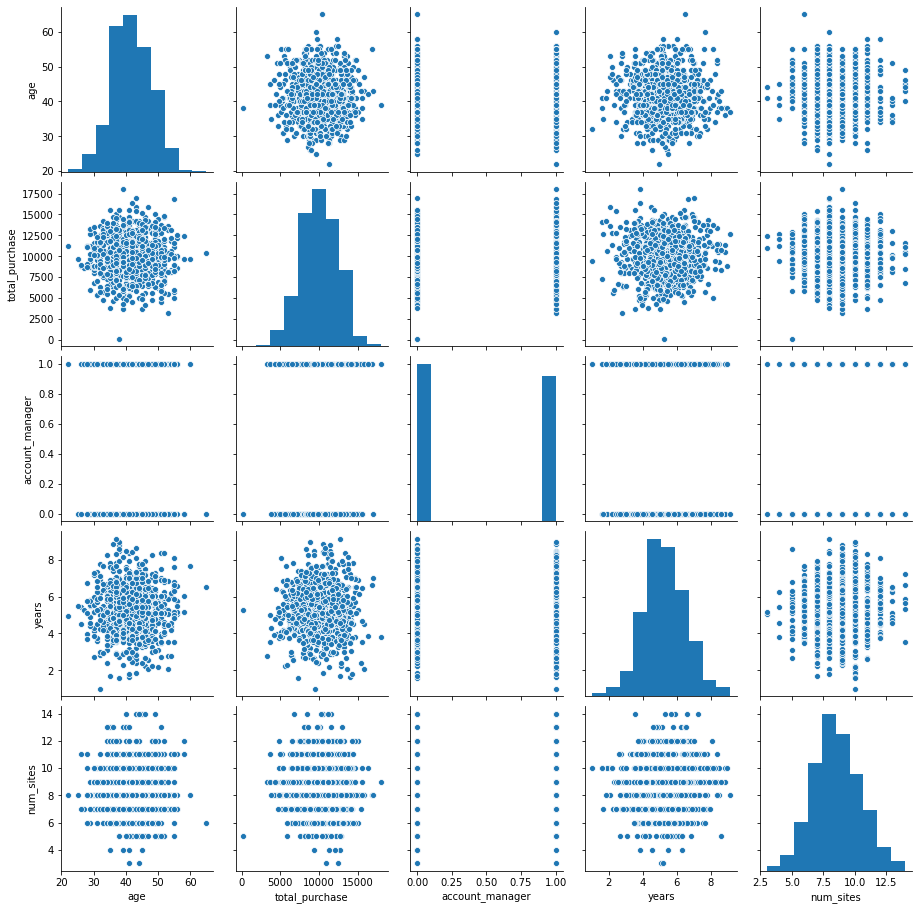

In [94]:
import seaborn as sns
sns.pairplot(corr_data)

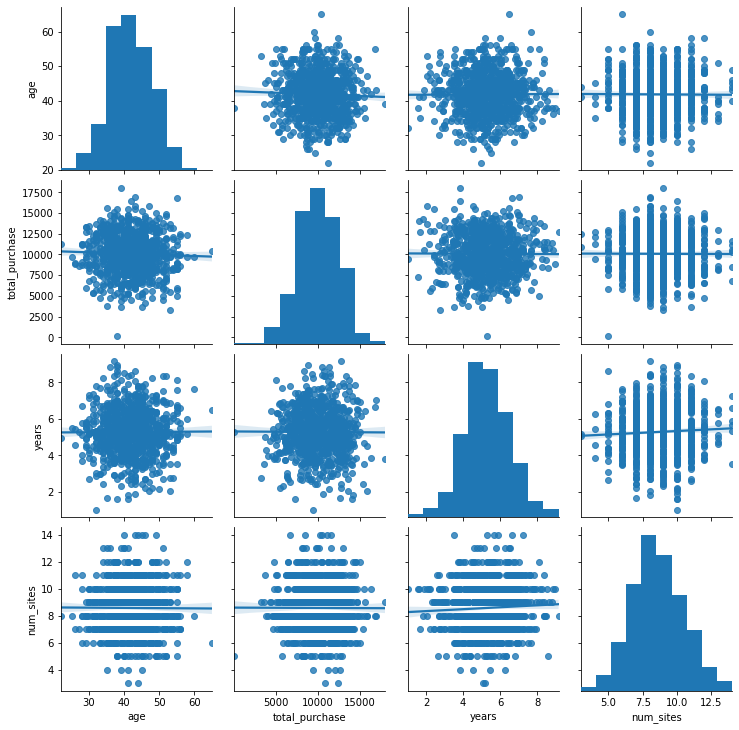

In [95]:
sns.pairplot(corr_data, vars=["age","total_purchase","years","num_sites"], kind="reg")

Data Preprocessing

In [96]:
spark_df = spark_df.dropna()

In [97]:
spark_df = spark_df.withColumn("age_square", spark_df.age**2)

In [98]:
spark_df.show(3)

+-----+----------------+----+--------------+---------------+-----+---------+-----+----------+
|index|           names| age|total_purchase|account_manager|years|num_sites|churn|age_square|
+-----+----------------+----+--------------+---------------+-----+---------+-----+----------+
|    0|Cameron Williams|42.0|       11066.8|              0| 7.22|      8.0|    1|    1764.0|
|    1|   Kevin Mueller|41.0|      11916.22|              0|  6.5|     11.0|    1|    1681.0|
|    2|     Eric Lozano|38.0|      12884.75|              0| 6.67|     12.0|    1|    1444.0|
+-----+----------------+----+--------------+---------------+-----+---------+-----+----------+
only showing top 3 rows



In [99]:
from pyspark.ml.feature import StringIndexer

stringIndexer = StringIndexer(inputCol="churn", outputCol="label")

In [100]:
indexed = stringIndexer.fit(spark_df).transform(spark_df)

In [101]:
indexed.dtypes

[('index', 'int'),
 ('names', 'string'),
 ('age', 'double'),
 ('total_purchase', 'double'),
 ('account_manager', 'int'),
 ('years', 'double'),
 ('num_sites', 'double'),
 ('churn', 'int'),
 ('age_square', 'double'),
 ('label', 'double')]

In [102]:
spark_df = indexed.withColumn("label", indexed["label"].cast("integer"))

In [103]:
spark_df.dtypes

[('index', 'int'),
 ('names', 'string'),
 ('age', 'double'),
 ('total_purchase', 'double'),
 ('account_manager', 'int'),
 ('years', 'double'),
 ('num_sites', 'double'),
 ('churn', 'int'),
 ('age_square', 'double'),
 ('label', 'int')]

In [104]:
from pyspark.ml.feature import VectorAssembler

In [105]:
spark_df.columns

['index',
 'names',
 'age',
 'total_purchase',
 'account_manager',
 'years',
 'num_sites',
 'churn',
 'age_square',
 'label']

In [114]:
bag = ["age", "total_purchase", "account_manager", "years","num_sites"]

In [115]:
vectorAssembler = VectorAssembler(inputCols=bag, outputCol="features")

In [116]:
va_df = vectorAssembler.transform(spark_df)

In [117]:
final_df = va_df.select(["features","label"])

In [118]:
final_df.show()

+--------------------+-----+
|            features|label|
+--------------------+-----+
|[42.0,11066.8,0.0...|    1|
|[41.0,11916.22,0....|    1|
|[38.0,12884.75,0....|    1|
|[42.0,8010.76,0.0...|    1|
|[37.0,9191.58,0.0...|    1|
|[48.0,10356.02,0....|    1|
|[44.0,11331.58,1....|    1|
|[32.0,9885.12,1.0...|    1|
|[43.0,14062.6,1.0...|    1|
|[40.0,8066.94,1.0...|    1|
|[30.0,11575.37,1....|    1|
|[45.0,8771.02,1.0...|    1|
|[45.0,8988.67,1.0...|    1|
|[40.0,8283.32,1.0...|    1|
|[41.0,6569.87,1.0...|    1|
|[38.0,10494.82,1....|    1|
|[45.0,8213.41,1.0...|    1|
|[43.0,11226.88,0....|    1|
|[53.0,5515.09,0.0...|    1|
|[46.0,8046.4,1.0,...|    1|
+--------------------+-----+
only showing top 20 rows



Test-Train

In [119]:
splits = final_df.randomSplit([0.7,0.3])
train_df = splits[0]
test_df = splits[1]

In [120]:
train_df

DataFrame[features: vector, label: int]

In [121]:
test_df

DataFrame[features: vector, label: int]

# GBM Modelling

In [122]:
from pyspark.ml.classification import GBTClassifier

In [123]:
gbm = GBTClassifier(maxIter=10, featuresCol="features", labelCol="label")

In [124]:
gbm_model = gbm.fit(train_df)

In [125]:
y_pred = gbm_model.transform(test_df)

In [126]:
y_pred

DataFrame[features: vector, label: int, rawPrediction: vector, probability: vector, prediction: double]

In [127]:
ac = y_pred.select("label","prediction")

In [128]:
ac.filter(ac.label == ac.prediction).count() / ac.count()

0.8458646616541353

In [129]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator

evaluator = BinaryClassificationEvaluator()

paramGrid = (ParamGridBuilder()
            .addGrid(gbm.maxDepth, [2,4,6])
            .addGrid(gbm.maxBins, [20,30])
            .addGrid(gbm.maxIter, [10,20])
            .build())

cv = CrossValidator(estimator=gbm, estimatorParamMaps=paramGrid, evaluator=evaluator, numFolds=10)

In [130]:
cv_model = cv.fit(train_df)

In [131]:
y_pred = cv_model.transform(test_df)
ac = y_pred.select("label", "prediction")

In [132]:
ac.filter(ac.label == ac.prediction).count() / ac.count()

0.8872180451127819

In [133]:
evaluator.evaluate(y_pred)

0.8469919217687074

## Leave or Stay?

In [136]:
import pandas as pd
names = pd.Series(["Ali Gultiken", "Metin Tekin", "Feyyaz Ucar", "Sergen Yalcin", "Suleyman Seba"])
age = pd.Series([40,41,42,43,70])
total_purchase = pd.Series([30000, 10000, 6000, 30000, 100000])
account_manager = pd.Series([1,0,0,1,1])
years = pd.Series([20, 10, 3, 8, 30])
num_sites = pd.Series([30,8,8,6,50])

new_customers = pd.DataFrame({
    'names':names,
    'age':age,
    'total_purchase':total_purchase,
    'account_manager':account_manager,
    'years': years,
    'num_sites': num_sites
})

new_customers.columns

Index(['names', 'age', 'total_purchase', 'account_manager', 'years',
       'num_sites'],
      dtype='object')

In [137]:
new_customers

names  age  total_purchase  account_manager  years  num_sites
0   Ali Gultiken   40           30000                1     20         30
1    Metin Tekin   41           10000                0     10          8
2    Feyyaz Ucar   42            6000                0      3          8
3  Sergen Yalcin   43           30000                1      8          6
4  Suleyman Seba   70          100000                1     30         50

In [138]:
new_sdf = spark.createDataFrame(new_customers)

In [139]:
type(new_sdf)

pyspark.sql.dataframe.DataFrame

In [140]:
new_sdf.show()

+-------------+---+--------------+---------------+-----+---------+
|        names|age|total_purchase|account_manager|years|num_sites|
+-------------+---+--------------+---------------+-----+---------+
| Ali Gultiken| 40|         30000|              1|   20|       30|
|  Metin Tekin| 41|         10000|              0|   10|        8|
|  Feyyaz Ucar| 42|          6000|              0|    3|        8|
|Sergen Yalcin| 43|         30000|              1|    8|        6|
|Suleyman Seba| 70|        100000|              1|   30|       50|
+-------------+---+--------------+---------------+-----+---------+



In [141]:
new_customers = vectorAssembler.transform(new_sdf)

In [142]:
results=cv_model.transform(new_customers)

In [143]:
results.select("names","prediction").show()

+-------------+----------+
|        names|prediction|
+-------------+----------+
| Ali Gultiken|       1.0|
|  Metin Tekin|       0.0|
|  Feyyaz Ucar|       0.0|
|Sergen Yalcin|       0.0|
|Suleyman Seba|       1.0|
+-------------+----------+

